In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sampler1(data, mu0=0.,kappa0=1.,alpha0=1., beta0=1.,num_samples=1000):
    n = len(data)
    xbar = np.mean(data)
    mu = np.zeros(num_samples)
    omega = np.zeros(num_samples)
    mu_n = (kappa0*mu0 + n*xbar)/(kappa0+n)
    kappa_n = kappa0+n
    alpha_n = alpha0 + n/2.
    beta_n = beta0+0.5*np.sum((data-xbar)**2) + n*kappa0*((xbar-mu0)**2)/(2*(kappa0+n))
  
    for i in range(num_samples):
        omega[i] =np.random.gamma(shape=alpha_n, scale=1/beta_n)
        mu[i] = np.random.normal(loc=mu_n,scale=1/np.sqrt(omega[i]*kappa_n))
  
    return mu, omega

def sampler2(data,mu0=0.,kappa0=1.,alpha0=1., beta0=1.,num_samples=1000,burnin=100):
    n = len(data)
    xbar = np.mean(data)
    mu = np.zeros(num_samples+burnin)
    omega = np.zeros(num_samples+burnin)
    mu_n = (kappa0*mu0 + n*xbar)/(kappa0+n)
    kappa_n = kappa0+n
    alpha_n = alpha0 + n/2.
    beta_n = beta0+0.5*np.sum((data-xbar)**2) + n*kappa0*((xbar-mu0)**2)/(2*(kappa0+n))

    omega[0]=alpha0/beta0
    mu[0]=mu0
    for i in range(1,num_samples+burnin):
        beta_param = 0.5*(kappa_n*((mu[i-1]-mu_n)**2)) +beta_n
        omega[i]=np.random.gamma(shape=alpha_n, scale=1/beta_param)
        mu[i]=np.random.normal(loc=mu_n,scale=1/np.sqrt(omega[i]*kappa_n))
  
    return mu[burnin:],omega[burnin:]



In [6]:
true_mean = 4.
true_prec = 0.5
true_sd = 1/np.sqrt(true_prec)
num_obs = 1000
data = np.random.normal(size=num_obs,loc=true_mean,scale=true_sd)


In [7]:
mu1,omega1 = sampler1(data)

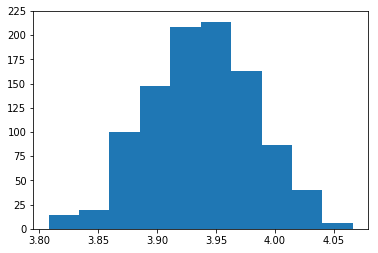

In [8]:
plt.hist(mu1)
plt.show()

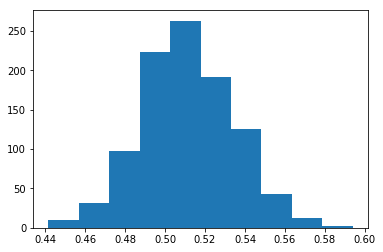

In [9]:
plt.hist(omega1)
plt.show()

In [12]:
mu2,omega2 = sampler2(data)

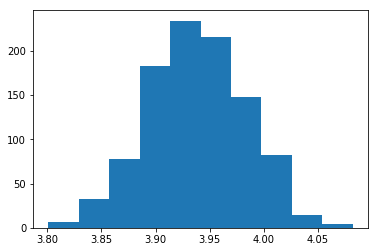

In [13]:
plt.hist(mu2)
plt.show()